### Let's start by installing the libraries

In [1]:
# !pip install plotly
# !pip install dash # developed to create reactive web applications.dash board
# !pip install wordcloud # especially in the field of word cloud nlp can be used for the importance of a word
# !pip install cufflinks # is a library that can work with the pandas library.
# !pip install missingno # to visualise missing data
# !pip install nbformat

### Now let's do our imports

In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import missingno

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True) # we launch it to view it inline, same to = %matplotlib inline

import plotly.graph_objs as go # low-level interface for data visualisation
import plotly.express as px # high-level interface for data visualisation, in short fewer lines of code for a more complex visualisation

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf # is a library that can work with the pandas library.
cf.go_offline() # we make graphics offline

# warnings
import warnings
warnings.filterwarnings("ignore") # we use it to not see trivial warnings in the code lines.

### Now let's load the data set that we will make a sample. Let's define the data first, of course. Our data set contains information about universities around the world, including various characteristics and evaluations. Each feature contains information according to criteria that evaluate different aspects of universities.

In [17]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

<p id="0a4a" class="pw-post-body-paragraph me mf fp mg b mh mi mj mk ml mm mn mo mp mq mr ms mt mu mv mw mx my mz na nb fi bj" data-selectable-paragraph="">Our data set includes 14 features in total. These are;</p>
<ol class=""><li id="ed0b" class="me mf fp mg b mh mi mj mk ml mm mn mo mp mq mr ms mt mu mv mw mx my mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">world_rank</strong>: Ranking of universities worldwide.</li><li id="a8e8" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">university_name</strong>: Name of the university.</li><li id="8449" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">country</strong>: The country where the university is located.</li><li id="0748" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">teaching</strong>: A score indicating the quality of teaching.</li><li id="8a99" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">international</strong>: A measure of international diversity and interaction.</li><li id="201f" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">research</strong>: A score indicating the research performance of the university.</li><li id="4bec" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">citations</strong>:Number of citations or impact of the University's research outputs.</li><li id="4e8f" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">income</strong>: The income or financial health of the university.</li><li id="2ae6" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">total_score</strong>: A score indicating the overall performance of universities.</li><li id="9344" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">num_students</strong>:Number of students enrolled at the university.</li><li id="02c1" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">student_staff_ratio</strong>: Number of staff per student.</li><li id="319f" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">international_students</strong>: Percentage or number of international students at the university.</li><li id="f336" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">female_male_ratio</strong>: Female to male ratio.</li><li id="e75a" class="me mf fp mg b mh nw mj mk ml nx mn mo mp ny mr ms mt nz mv mw mx oa mz na nb nt nu nv bj" data-selectable-paragraph=""><strong class="mg fq">year</strong>: Year of data collection.</li></ol>
<p id="d34a" class="pw-post-body-paragraph me mf fp mg b mh mi mj mk ml mm mn mo mp mq mr ms mt mu mv mw mx my mz na nb fi bj" data-selectable-paragraph="">Now I want to select the first 100 rows of our data set and make my visualisation examples over this data set.</p>

In [18]:
df = timesData.iloc[:100, :]

### Line Chart

<p id="bfd0" class="pw-post-body-paragraph me mf fp mg b mh oy mj mk ml oz mn mo mp pa mr ms mt pb mv mw mx pc mz na nb fi bj" data-selectable-paragraph="">A line graph is a type of graph that is often used to show values that change over time. Line graphs are also used to show changes over time, to identify trends, to make comparisons, and to make predictions.</p>
<p id="ea0f" class="pw-post-body-paragraph me mf fp mg b mh mi mj mk ml mm mn mo mp mq mr ms mt mu mv mw mx my mz na nb fi bj" data-selectable-paragraph="">Let's draw a line chart with the Plotly library. With this piece of code, under the title<em class="nc"> “Citation and Teaching vs World Rank of Top 100 Universities”</em> two line charts will be drawn showing <strong class="mg fq">the relationship between the world rank (on the x-axis) and the number of citations and teaching score (on the y-axis).</strong> Each line will be a different colour, and when the mouse hovers over each point, the name of the university corresponding to that point will be displayed.</p>

In [19]:
#plt.style.use("ggplot")
# creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # This determines the drawing mode for the scatter trace. "mode=text" prints the text "text" items appear in the coordinates.  
                                       # Otherwise, the "text" elements appear on hover.  
                                       # The default value is "lines+markers" if there are less than 20 points and the track is not stacked. Otherwise, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", # we can think of it as axes
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  # We give the chart variables and layout parameters we defined above into figure as dict 
iplot(fig)                                # We plot it with iplot(fig).

### Scatter Plot

<p id="0dbd" class="pw-post-body-paragraph me mf fp mg b mh oy mj mk ml oz mn mo mp pa mr ms mt pb mv mw mx pc mz na nb fi bj" data-selectable-paragraph="">Scatter plot is a type of graph used to visually distinguish the relationship between two variables, data distribution and data groups.</p>
<p id="43b9" class="pw-post-body-paragraph me mf fp mg b mh mi mj mk ml mm mn mo mp mq mr ms mt mu mv mw mx my mz na nb fi bj" data-selectable-paragraph="">Now let's draw a scatter plot with plotly. With this piece of code, it is aimed to visualise <strong class="mg fq">the world rankings of the top 100 universities in</strong> 2014, 2015 and 2016 with a scatter plot against their citation numbers.</p>

In [20]:
# Filtering the data to include the top 100 universities' citation counts for the years 2014, 2015, and 2016.
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

### Bar Chart

<p id="90cb" class="pw-post-body-paragraph me mf fp mg b mh oy mj mk ml oz mn mo mp pa mr ms mt pb mv mw mx pc mz na nb fi bj" data-selectable-paragraph="">Bar charts are preferred for displaying the values of categorical data, making comparisons between them, visualising data distribution and frequency distribution. To summarise, bar charts are used to visualise categorical data values or frequencies and to make comparisons between different categories.</p>

<p id="577f" class="pw-post-body-paragraph me mf fp mg b mh mi mj mk ml mm mn mo mp mq mr ms mt mu mv mw mx my mz na nb fi bj" data-selectable-paragraph="">Now let's draw a bar chart with plotly. This code fragment shows a grouped bar chart <strong class="mg fq">showing the citations and teaching values of three selected universities in 2014. </strong></p>

 

In [21]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Pie Chart

Pie charts are used to show the proportional distribution of certain parts of a whole, to visualise categorical data, to show parts within a whole. Pie charts are also suitable for obtaining information about how much certain parts of a total (e.g. a budget, population or sales) make up.

Now let's draw a pie chart with plotly. With this piece of code, the student numbers of certain universities are shown in a pie chart. Each slice represents a university. Hovering over the slices displays the name of the university and the percentage of that slice. Also, the last two university slices are highlighted off-centre and the graph has a donut-shaped gap.

In [22]:
# First, we take the data for 2016 and the first 7 records.
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

# Take the num_students column, remove the commas and convert the string to float.
df = df2016.num_students
df1 = (df.str.replace(",", "")).astype("float")
df2 = list((df.str.replace(",", "")).astype("float"))

# With list comprehension we convert the values in the num_students column to float.
pie_list = [float(each.replace(",", "")) for each in df2016.num_students]

# With the labels variable, we place the names of the pie chart slices.
labels = df2016.university_name

# We create the Figure object. 
fig = {
    "data" : [
        {
            "values" : pie_list,  # The values that will determine the percentiles.
            "labels" : labels,  # The label for each slice.
            "domain" : {"x": [0, .5]},  # Position in the graph.
            "name" : "Number Of Students Rates",  # Graphic name.
            "hoverinfo" : "label + percent",  # Information to be displayed when hovering over it.
            "hole" : .2,  # The size of the gap in the centre makes this a donut chart.
            "type" : "pie",  # Chart type.
            "pull" : [0,0,0,0,0, 0.2, 0.2]  # We pull certain slices for highlighting, here the last two slices are pulled.
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",  # Main title.
        "annotations" : [
            {"font" : {"size" : 20},  # Font size.
             "text" : "Number of Students",  # Commentary.
             "x" : 0.3,  # X location.
             "y" : 1  # Y location.
            },
        ]
    }
}

# We draw the created Figure object.
iplot(fig)

### Buble Chart

A bubble chart is a type of chart that is often used to show three-dimensional data together. A bubble chart is used to visualise the relationship of three or more variables together.

<p id="ceb8" class="pw-post-body-paragraph mg mh fr mi b mj mk ml mm mn mo mp mq mr ms mt mu mv mw mx my mz na nb nc nd fk bj" data-selectable-paragraph="">Now let's draw a bubble chart with plotly. With this piece of code, <strong class="mi fs">the world ranking of universities is shown on the X axis and their teaching scores are shown on the Y axis. </strong>Each dot represents a university, the colours of the dots change according to their international scores and their sizes change according to the number of students. This graph <strong class="mi fs">shows the comparison of teaching and international scores of various universities.</strong></p>

In [23]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]  # Select the 20 best universities in the world in 2016

num_students_size  = [float(each.replace(",", ".")) for each in df2016.num_students]  # convert num_students column to float type

international_color = [float(each) for each in df2016.international]  # convert international column to float type

data = [  # Define the data to create scatter plot
    {
        "y" : df2016.teaching,  # use the teaching column as the y-axis
        "x" : df2016.world_rank,  # use the world_rank column as the x-axis
        "mode" : "markers",  # use markers mode for scatter plot
        "marker" : {  # set marker properties
            "color" : international_color,  # set marker colour with international_colour list
            "size" : num_students_size,  # set marker size with num_students_size list
            "showscale" : True  # show colour scale
        },
        "text" : df2016.university_name  # show university name for each marker
    }
]
iplot(data)  # draw a graph

### Histogram

A histogram is a type of graph used to show the distribution of values in a data set. A histogram is used to visualise the frequency distribution of a data set and to evaluate the central tendency and dispersion.

Now let's plot a histogram with plotly. With this code fragment, **two histograms showing the distribution of student-staff ratio in universities between 2011 and 2012 are plotted.** Since the histograms overlap, their transparency is adjusted with the opacity parameter. In this way, the differences and similarities between the two years can be observed more clearly.

In [24]:
# 1. Assigns the 2011 student-staff ratio to the variable x2011.
x2011 = timesData.student_staff_ratio[timesData.year == 2011]

# 2. Assigns the student-staff ratio of 2012 to the variable x2012.
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

# 3. Creates a histogram for 2011.
trace1 = go.Histogram(
    x=x2011,  # Assigns the variable x2011 to the x-axis.
    opacity=0.75,  # Determines the transparency of the histogram.
    name = "2011",  # Determines the name of the histogram.
    marker=dict(color='rgba(171, 50, 96, 0.6)')  # Determines the colour of the histogram.
)

# 4. For the year 2012, it creates another histogram.
trace2 = go.Histogram(
    x=x2012,  # Assigns the variable x2012 to the x-axis.
    opacity=0.75,  # Determines the transparency of the histogram.
    name = "2012",  # Determines the name of the histogram.
    marker=dict(color='rgba(12, 50, 196, 0.6)')  # Determines the colour of the histogram.
)

# 5. Encloses two histograms in a data list.
data = [trace1, trace2]

# 6. Sets the layout and titles of the chart.
layout = go.Layout(
    barmode='overlay',  # Allows two histograms to overlap.
    title=' students-staff ratio in 2011 and 2012',  # Determines the title of the graph.
    xaxis=dict(title='students-staff ratio'),  # Determines the title of the X axis.
    yaxis=dict(title='Count')  # Determines the title of the Y axis.
)

# 7. Creates a Figure object using data and layout.
fig = go.Figure(data=data, layout=layout)

# 8. Draws the created Figure object.
iplot(fig)

### Word Cloud

Word cloud is used to visualise words in text data according to their frequency or importance. Word cloud chart is used to quickly visualise key concepts and frequently occurring words in text data.

Now let's make a word cloud example with plotly. With this code fragment, **a word cloud is created and displayed using the names of the countries specified in 2011.** The word cloud presents the names of the countries in a visually appealing way and saves the saved graph as "graph.png" on your computer.

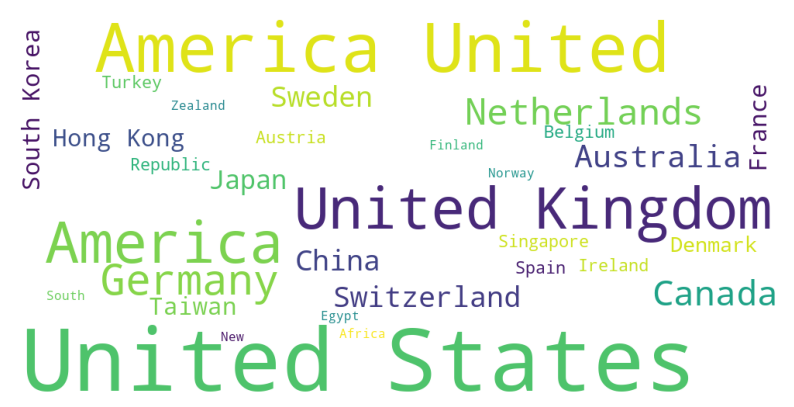

In [25]:
# 1. Assigns the countries of 2011 to the variable x2011.
x2011 = timesData.country[timesData.year == 2011]

# 2. Creates a 10x10 subplot.
plt.subplots(figsize = (10, 10))

# 3. Creates a word cloud by combining the countries in the variable x2011.
wordcloud = WordCloud(
    background_color= "white",  # Sets the background colour of the word cloud to white.
    width = 1000,  # Determines the width of the word cloud.
    height= 500  # Determines the height of the word cloud.
).generate(" ".join(x2011))

# 4. Shows the generated word cloud.
plt.imshow(wordcloud)

# 5. Switches off the axes of the chart so that only the word cloud is visible.
plt.axis("off")

# 6. Saves the graph to your computer as "graph.png".
plt.savefig("graph.png")

# 7. Shows the graph on the screen.
plt.show()

### Box Plots

Box plot is a type of chart used to show summary statistics (median, quartiles, outliers, etc.) of a data set. A box plot is used to visualise the summary statistics of a data set, detect outliers and make comparisons between different groups or categories.

Now let's draw a box plot with plotly. With this piece of code, we will draw **two Box Plot graphs for the total scores (total_score) and research scores (research) of universities in 2015.** With these Box Plots, we will get visual information about the summary statistics of the data (median, quartiles, minimum, maximum and outliers).

In [26]:
# 1. Assigns 2015 data to variable x2015.
x2015 = timesData[timesData.year == 2015]

# 2. Creates a Box Plot using the x2015.total_score data.
trace0 = go.Box(
    y=x2015.total_score,  # Specifies the data to be displayed on the y-axis of the Box Plot.
    name = 'total score of universities in 2015',  # Specifies the name of the chart.
    marker = dict(color = 'rgb(12, 12, 140)')  # Specifies the colour of the graph.
)

# 3. Creates a Box Plot using the x2015.research data.
trace1 = go.Box(
    y=x2015.research,  # Specifies the data to be displayed on the y-axis of the Box Plot.
    name = 'research of universities in 2015',  # Specifies the name of the chart.
    marker = dict(color = 'rgb(12, 128, 128)')  # Specifies the colour of the graph.
)

# 4. Collects the created Box Plots in a list.
data = [trace0, trace1]

# 5. Draws the created Box Plots.
iplot(data)

### Scatter Matrix Plots

Scatter Matrix Plots is a visualisation method used to examine the relationship between multiple continuous variables. Scatter Matrix Plots can be used to quickly visualise relationships between multiple continuous variables, examine the distributions of variables and perform multivariate data analysis.

Now let's plot a Scatter Matrix Plots with plotly. This code fragment creates a scatter plot matrix **based on the "research", "international", and "total_score" columns of universities in 2015.** The scatter plot matrix contains a series of scatter plots showing the relationships between multiple variables. Box plots on the diagonal show summary statistics for the variable of interest. The 'Portland' colour scheme chosen makes the graph more readable and understandable.

In [27]:
# 1. Imports the figure_factory module of Plotly.
import plotly.figure_factory as ff

# 2. Assigns 2015 data to dataframe variable.
dataframe = timesData[timesData.year == 2015]

# 3. Selects specific columns from the dataframe variable and assigns them to the data2015 variable.
data2015 = dataframe.loc[:,["research","international", "total_score"]]

# 4. data2015 adds a new "index" column to the DataFrame and assigns consecutive numbers to this column.
data2015["index"] = np.arange(1,len(data2015)+1)

# 5. Creates a scatter plot matrix using data2015 data.
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat', height=700, width=700)

# 6. Draws the generated scatter plot matrix.
iplot(fig)

### Animation with Plotly

Plotly can be used to add a dynamic dimension to animations and data visualisations over time.

Especially Plotly's animation use cases:
- Showing Time-Varying Data
- Understanding Trends and Patterns
- Compelling Presentations
- Scenario Comparisons

Animations can be used with Plotly to visualise data that changes over time, understand trends and patterns, make impressive presentations and compare different scenarios.

With this last graph that we will draw using Plotly, we will create a scatter plot showing **how the relationship between income per capita (GDP per Capita) and life expectancy (Life Expectancy) has changed over the years** with a new data set.

***Each point on the graph:*** Represents a country.

***Colour of the dots:*** Represents different continents. The colours are separated by continent, so that countries from the same continent are shown in a similar colour.

***Size of Dots:*** Represents the population of the country. Larger dots indicate countries with higher populations, while smaller dots indicate countries with lower populations.

***Animation:*** There is a time bar at the bottom of the graph. Using this time bar, you can observe how per capita income and life expectancy have changed over the years.

***Hover Feature:*** When you hover over any point, you can see which country that point represents.

This graph is a dynamic and interactive visualisation of the impact of economic growth (income per capita) on life expectancy over the years. You can also clearly see the differences between continents and countries.

In [28]:
import plotly.express as px  # Imports the Plotly Express library.
df = px.data.gapminder()  # Gapminder loads the data set into the variable df.

# Creates a scatter plot using the px.scatter function. 
# In this graph, income per capita (GDP per Capita) on the x-axis, 
# on the y-axis is the life expectancy (Life Expectancy).
# When adding animation by years with animation_frame, 
# With animation_group the countries are set as animation groups.
# With the size parameter, the size of the points is adjusted according to the population of the country.
# With the colour parameter the dots are coloured according to their continent.
# hover_name is used to show the name of the country when hovering over it.
# log_x=True uses a logarithmic scale for the x-axis.
# size_max=55 sets the maximum size of the point.
# range_x and range_y set the value ranges for the x and y axes.
px.scatter(df, 
           x="gdpPercap",
           y="lifeExp",
           animation_frame="year",
           animation_group="country",
           size="pop",
           color="continent",
           hover_name="country",
           log_x=True,
           size_max=55,
           range_x=[100,100000],
           range_y=[25,90])

"As a result, Plotly, as one of the pioneers of the innovative approach, makes it possible not only to create graphs, but also to interact with these graphs. This not only improves the quality of information presentation, but also allows for more in-depth analyses.